In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

##### Load data

In [2]:
# read data from file
data = pd.read_csv('./data/house_data.csv')
data.head()

,URL,Adresse,Year build,Pris,Type,Energimærke,Ejerudgift,Boligydelse,Anvendelse,Boligtype,...,Kommunal ejerlav navn,Grundstørrelse,Lands ejerlav kode,Vejareal,Lands ejerlav navn,Primær matrikel,Ejendomsnummer,Kommunal ejerlav kode,Ejendomsværdiskat,Grundskyld
0,https://www.boliga.dk/bolig/1729830/krebsen_78...,Krebsen 78 5700 Svendborg,2006,225000,Andelsbolig,C,NaN,6717,Række kæde eller dobbelthus lodret adskillelse...,Egentlig beboelseslejlighed boligenhed med ege...,...,EGENSE BY EGENS,7221.0,430451.0,0.0,EGENSE BY EGENSE,J,194920.0,19.0,0.0,0.0
1,https://www.boliga.dk/bolig/1729730/fiskeparke...,Fiskeparken 25 Snaptun 7130 Juelsminde,2000,295000,Andelsbolig,C,NaN,6374,Fritliggende enfamiliehus,Egentlig beboelseslejlighed boligenhed med ege...,...,ØSTRUP BY GLUD,9924.0,1100452.0,245.0,ØSTRUP BY GLUD,J,16078.0,160.0,0.0,0.0
2,https://www.boliga.dk/bolig/1729667/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.boliga.dk/bolig/1729849/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.boliga.dk/bolig/1729668/annebergpa...,Annebergparken 997 st 4500 Nykøbing Sj,2022,395655,Andelsbolig,NaN,NaN,4708,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Select only data for 'Type' 'Villa'

In [3]:
data = data[data['Type'] == 'Villa']

##### Before dropping columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23750 entries, 5 to 38581
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   URL                          23750 non-null  object 
 1   Adresse                      23750 non-null  object 
 2   Year build                   23750 non-null  object 
 3   Pris                         23750 non-null  object 
 4   Type                         23750 non-null  object 
 5   Energimærke                  23256 non-null  object 
 6   Ejerudgift                   23750 non-null  object 
 7   Boligydelse                  0 non-null      object 
 8   Anvendelse                   23750 non-null  object 
 9   Boligtype                    23749 non-null  object 
 10  Enhedsareal                  23750 non-null  object 
 11  Beboelsesareal               23750 non-null  object 
 12  Værelser                     23750 non-null  float64
 13  Antal toiletter 

##### Drop non-relevant columns (incl. Type +  Boligydelse)

In [5]:
data.drop([
    'Vejareal',
    'Lands ejerlav kode',
    'Kommunal ejerlav kode',
    'Ejendomsnummer',
    'Primær matrikel',
    'Lands ejerlav navn',
    'Kommunal ejerlav navn',
    'Matrikelnummer',
    'Afvigende etager',
    'Boligstørrelse tinglyst',
    'Objekt status',
    'Boligstørrelse BBR',
    'Bygningsnummer',
    'Beboelsesareal',
    'URL',
    'Boligydelse',
    'Anvendelse',
    'Type'
], 'columns', inplace=True)

##### Missing values

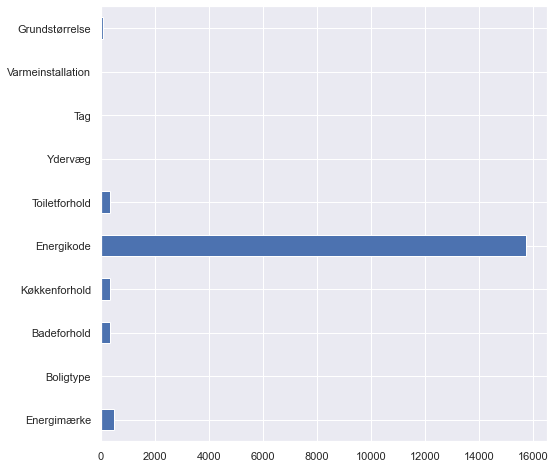

In [6]:
sb.set(font_scale=1)
data_null = data.isna().sum()
plt.figure(figsize=(8,8))
data_null[data_null!=0].plot(kind='barh');

In [7]:
# drop columns if lot of missing values
data.drop(['Energikode'], 'columns', inplace=True)

##### After dropping columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23750 entries, 5 to 38581
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Adresse                      23750 non-null  object 
 1   Year build                   23750 non-null  object 
 2   Pris                         23750 non-null  object 
 3   Energimærke                  23256 non-null  object 
 4   Ejerudgift                   23750 non-null  object 
 5   Boligtype                    23749 non-null  object 
 6   Enhedsareal                  23750 non-null  object 
 7   Værelser                     23750 non-null  float64
 8   Antal toiletter              23750 non-null  float64
 9   Badeforhold                  23418 non-null  object 
 10  Antal badeværelser           23750 non-null  float64
 11  Køkkenforhold                23410 non-null  object 
 12  Toiletforhold                23418 non-null  object 
 13  Ydervæg         

### Format values

In [9]:
# Address to zipcode
data['Adresse'] = data['Adresse'].str.extract(r'(\d{4})').astype('int')

In [10]:
# Year build
data['Year build'] = data['Year build'].astype('int')

In [11]:
# Price
data['Pris'] = data['Pris'].astype('int')

In [12]:
# Ejerudgift
data['Ejerudgift'] = data['Ejerudgift'].astype('float')

In [13]:
# Enhedsareal
data['Enhedsareal'] = data['Enhedsareal'].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23750 entries, 5 to 38581
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Adresse                      23750 non-null  int32  
 1   Year build                   23750 non-null  int32  
 2   Pris                         23750 non-null  int32  
 3   Energimærke                  23256 non-null  object 
 4   Ejerudgift                   23750 non-null  float64
 5   Boligtype                    23749 non-null  object 
 6   Enhedsareal                  23750 non-null  float64
 7   Værelser                     23750 non-null  float64
 8   Antal toiletter              23750 non-null  float64
 9   Badeforhold                  23418 non-null  object 
 10  Antal badeværelser           23750 non-null  float64
 11  Køkkenforhold                23410 non-null  object 
 12  Toiletforhold                23418 non-null  object 
 13  Ydervæg         

##### Numerical data

In [15]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Etager,Carport,Seneste ombygning,Udhus,Boligstørrelse,Boligenhed med eget køkken,Boligenhed uden eget køkken,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,23750.000000,23750.000000,2.375000e+04,23750.000000,23750.000000,23750.000000,23750.000000,23750.000000,23750.000000,23750.000000,23750.000000,23750.000000,23750.000000,23750.000000,23750.000000,23681.000000,23750.000000,23750.000000
mean,6728.409011,1936.934905,2.272897e+06,2450.986147,161.492968,5.077895,1.651200,1.354863,1.034021,1.340842,878.893516,1.521347,134.762484,0.995621,0.002821,2160.141252,10464.978021,9244.730063
std,2096.141592,133.526867,2.374786e+06,1707.130033,70.702048,1.820621,0.694975,0.587933,0.190351,7.135125,987.127346,9.994261,63.767943,0.216537,0.063847,8083.364146,9100.172490,10841.703665
min,1061.000000,0.000000,8.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,4000.000000,1890.000000,6.750000e+05,1265.000000,100.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,75.000000,1.000000,0.000000,458.000000,4300.000000,2086.000000
25%,4913.000000,1920.000000,9.950000e+05,1597.000000,122.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,95.000000,1.000000,0.000000,700.000000,6100.000000,3602.250000
50%,6818.000000,1956.000000,1.695000e+06,2086.000000,151.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,125.000000,1.000000,0.000000,870.000000,8820.000000,6509.500000
75%,8660.000000,1973.000000,2.745000e+06,2780.000000,186.000000,6.000000,2.000000,2.000000,1.000000,0.000000,1983.000000,0.000000,161.000000,1.000000,0.000000,1201.000000,12600.000000,10642.750000
90%,9490.000000,1998.000000,4.286000e+06,3860.200000,229.000000,7.000000,2.000000,2.000000,1.000000,0.000000,2001.000000,0.000000,201.000000,1.000000,0.000000,2853.000000,17850.000000,18526.700000
max,9990.000000,2021.000000,6.000000e+07,62140.000000,2764.000000,46.000000,19.000000,9.000000,4.000000,140.000000,2020.000000,282.000000,2764.000000,12.000000,5.000000,308376.000000,323200.000000,287046.000000


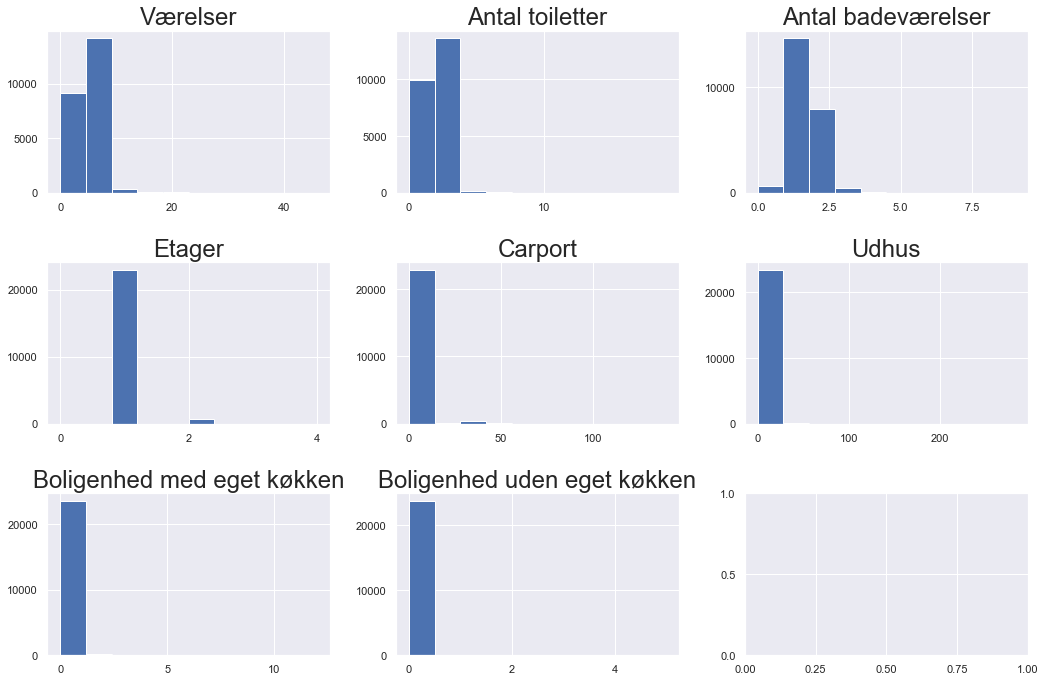

In [16]:
#pick out features, which have one dominant value in the whole sample
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
sb.set(font_scale=2)

data['Værelser'].hist(ax=axes[0,0])
axes[0,0].set_title('Værelser')

data['Antal toiletter'].hist(ax=axes[0,1])
axes[0,1].set_title('Antal toiletter')

data['Antal badeværelser'].hist(ax=axes[0,2])
axes[0,2].set_title('Antal badeværelser')

data['Etager'].hist(ax=axes[1,0])
axes[1,0].set_title('Etager')

data['Carport'].hist(ax=axes[1,1])
axes[1,1].set_title('Carport')

data['Udhus'].hist(ax=axes[1,2])
axes[1,2].set_title('Udhus')

data['Boligenhed med eget køkken'].hist(ax=axes[2,0])
axes[2,0].set_title('Boligenhed med eget køkken')

data['Boligenhed uden eget køkken'].hist(ax=axes[2,1])
axes[2,1].set_title('Boligenhed uden eget køkken')

plt.tight_layout()

# drop features
data.drop([
    'Carport',
    'Udhus',
    'Boligenhed med eget køkken',
    'Boligenhed uden eget køkken'
], 'columns', inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23750 entries, 5 to 38581
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Adresse             23750 non-null  int32  
 1   Year build          23750 non-null  int32  
 2   Pris                23750 non-null  int32  
 3   Energimærke         23256 non-null  object 
 4   Ejerudgift          23750 non-null  float64
 5   Boligtype           23749 non-null  object 
 6   Enhedsareal         23750 non-null  float64
 7   Værelser            23750 non-null  float64
 8   Antal toiletter     23750 non-null  float64
 9   Badeforhold         23418 non-null  object 
 10  Antal badeværelser  23750 non-null  float64
 11  Køkkenforhold       23410 non-null  object 
 12  Toiletforhold       23418 non-null  object 
 13  Ydervæg             23748 non-null  object 
 14  Tag                 23748 non-null  object 
 15  Etager              23750 non-null  float64
 16  Sene

### Categorical features

In [18]:
# Energimærke
data.Energimærke.unique()

array(['F', 'D', 'E', 'C', 'G', 'A10', nan, 'B', 'A15', 'A20', 'A', '0',
       'A2', 'A1'], dtype=object)

In [19]:
pd.set_option('display.max_columns', 40)
data.describe(include='all')

,Adresse,Year build,Pris,Energimærke,Ejerudgift,Boligtype,Enhedsareal,Værelser,Antal toiletter,Badeforhold,Antal badeværelser,Køkkenforhold,Toiletforhold,Ydervæg,Tag,Etager,Seneste ombygning,Boligstørrelse,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,23750.000000,23750.000000,2.375000e+04,23256,23750.000000,23749,23750.000000,23750.000000,23750.000000,23418,23750.000000,23410,23418,23748,23748,23750.000000,23750.000000,23750.000000,23746,23681.000000,23750.000000,23750.000000
unique,NaN,NaN,NaN,13,NaN,6,NaN,NaN,NaN,3,NaN,4,3,12,12,NaN,NaN,NaN,9,NaN,NaN,NaN
top,NaN,NaN,NaN,D,NaN,Egentlig beboelseslejlighed boligenhed med ege...,NaN,NaN,NaN,Badeværelse i enheden,NaN,Eget køkken med afløb,Vandskyllende toilet i enheden,Mursten,Fibercement herunder asbest,NaN,NaN,NaN,Fjernvarme blokvarme,NaN,NaN,NaN
freq,NaN,NaN,NaN,7442,NaN,22853,NaN,NaN,NaN,23101,NaN,23321,23373,21240,10071,NaN,NaN,NaN,10357,NaN,NaN,NaN
mean,6728.409011,1936.934905,2.272897e+06,NaN,2450.986147,NaN,161.492968,5.077895,1.651200,NaN,1.354863,NaN,NaN,NaN,NaN,1.034021,878.893516,134.762484,NaN,2160.141252,10464.978021,9244.730063
std,2096.141592,133.526867,2.374786e+06,NaN,1707.130033,NaN,70.702048,1.820621,0.694975,NaN,0.587933,NaN,NaN,NaN,NaN,0.190351,987.127346,63.767943,NaN,8083.364146,9100.172490,10841.703665
min,1061.000000,0.000000,8.000000e+04,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,4913.000000,1920.000000,9.950000e+05,NaN,1597.000000,NaN,122.000000,4.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,95.000000,NaN,700.000000,6100.000000,3602.250000
50%,6818.000000,1956.000000,1.695000e+06,NaN,2086.000000,NaN,151.000000,5.000000,2.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,125.000000,NaN,870.000000,8820.000000,6509.500000
75%,8660.000000,1973.000000,2.745000e+06,NaN,2780.000000,NaN,186.000000,6.000000,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,1.000000,1983.000000,161.000000,NaN,1201.000000,12600.000000,10642.750000


<ipython-input-20-b9d3612452f7>:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


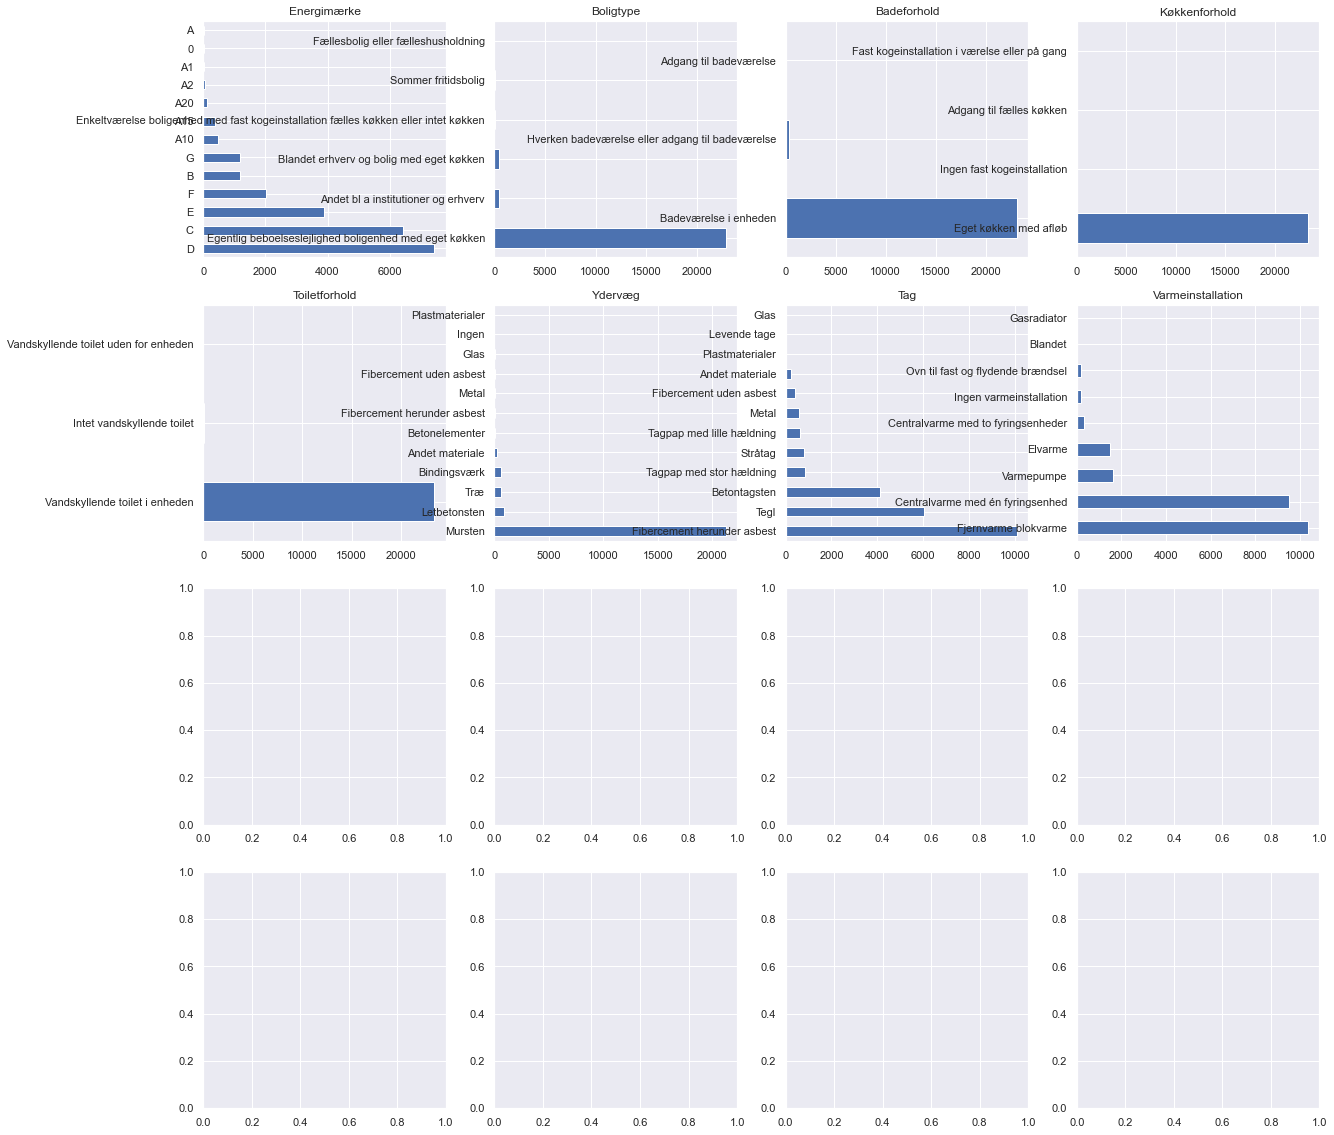

In [20]:
sb.set()
lst_out = ['Energimærke', 'Boligtype', 'Badeforhold',
           'Køkkenforhold', 'Toiletforhold',
           'Ydervæg', 'Tag', 'Varmeinstallation']
sb.set(font_scale=1)
n_row = 4
n_col = 4
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
for i in enumerate(lst_out):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

# drop features
data.drop([
    'Boligtype',
    'Badeforhold',
    'Køkkenforhold',
    'Toiletforhold'
], 'columns', inplace=True)

##### Corrplot

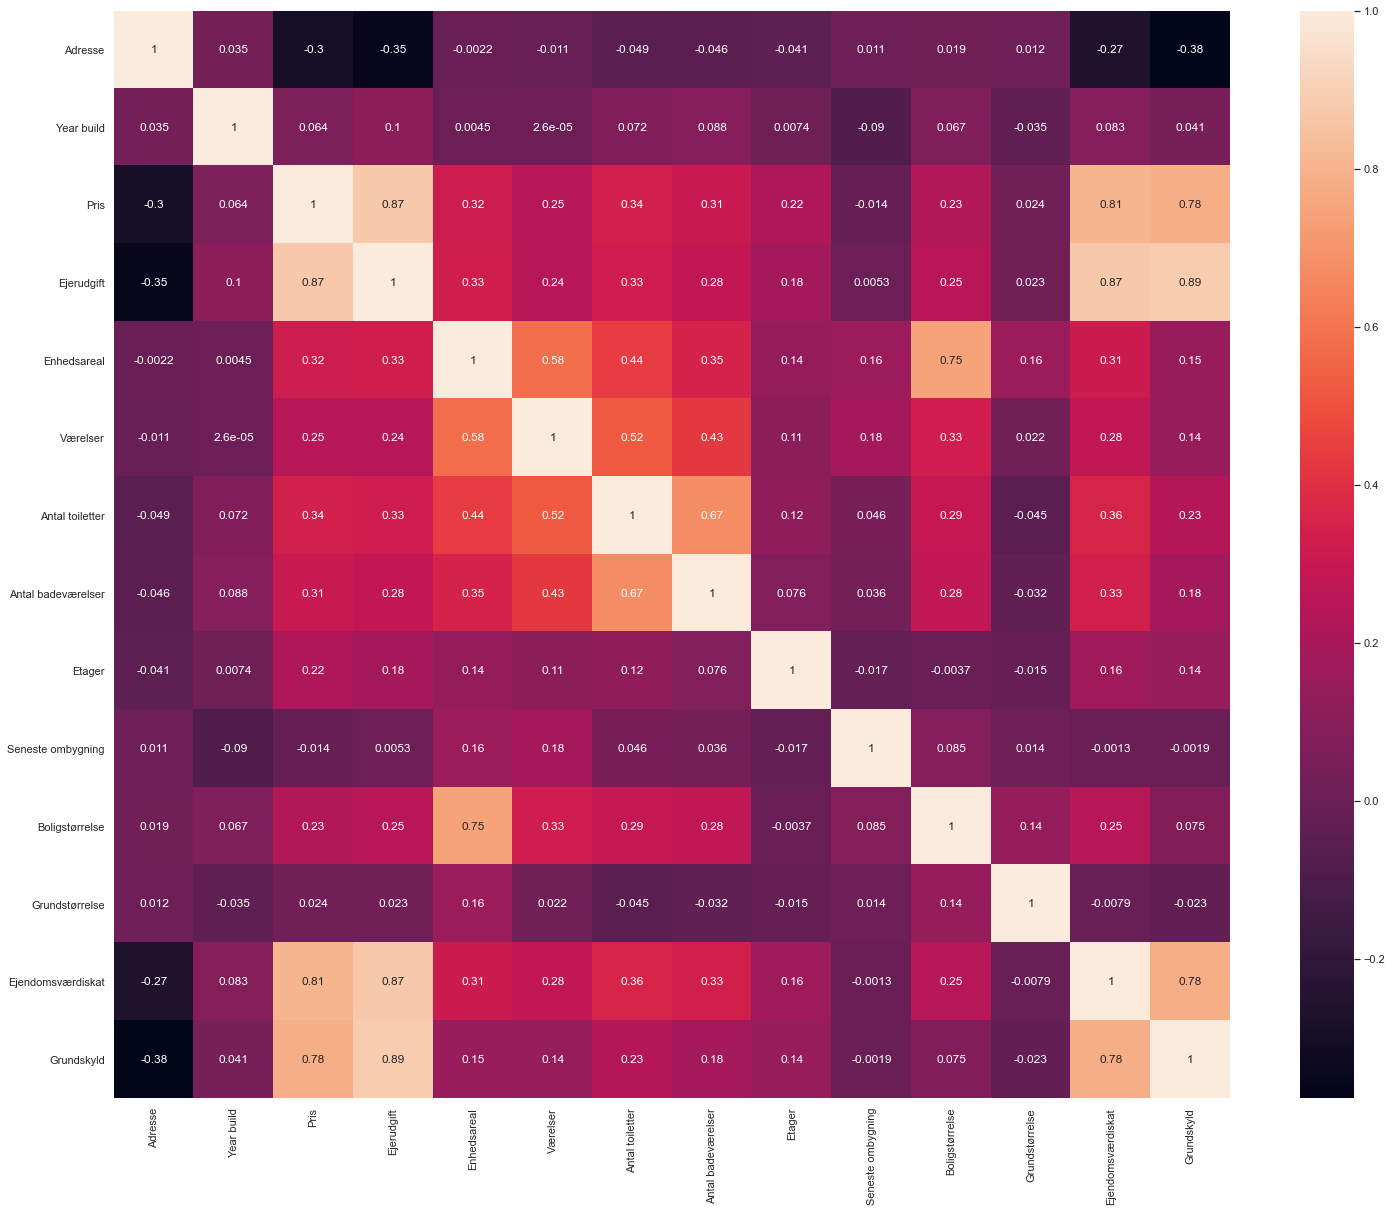

In [21]:
plt.figure(figsize=(25,20))
sb.set(font_scale=1)
sb.heatmap(data.corr(),annot=True);

In [22]:
# dropping most correlated features
data.drop(['Antal toiletter', 'Ejendomsværdiskat', 'Grundskyld', 'Ejerudgift'], 'columns', inplace=True)

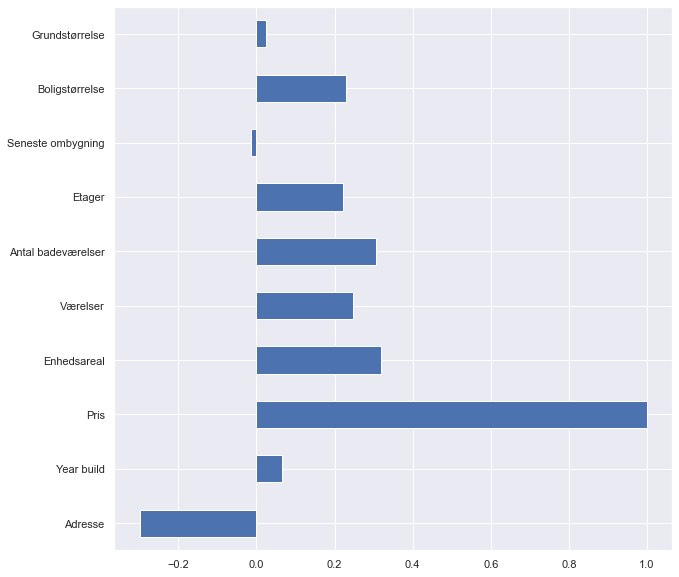

In [23]:
plt.figure(figsize=(10,10))
data.corr()['Pris'].plot(kind='barh');

##### Target

NameError: name 'data_new' is not defined

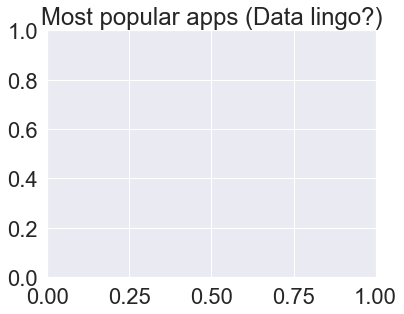

In [24]:
fig = plt.figure(figsize=(20,10))
sb.set(font_scale=2)
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Most popular apps (Data lingo?)')
ax1.ticklabel_format(style='plain')
data['Pris'].hist(bins=40);

ax2 = fig.add_subplot(2,3,2)
ax2.set_title('All apps (Data lingo?)')
ax2.ticklabel_format(style='plain')
sb.boxplot(x=data['Pris'])
plt.tight_layout()

In [ ]:
# drop data with abnormal target value
print(pd.value_counts(data['Pris']<8000000))
data = data[data['Pris']<8000000]
#target_val = data_new['SalePrice'].values
data.head()

##### Split data to numeric and categorical

In [ ]:
numer = set(data.corr()['Pris'].index)
categ = list(set(data.columns) - set(data.corr()['Pris'].index))

In [ ]:
numer

In [ ]:
categ

In [ ]:
sb.set()
n_row = 2
n_col = 2
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sb.set(font_scale=2)
for i in enumerate(categ):
    pd.value_counts(data[i[1]]).plot(kind='barh',ax=axes[i[0]//n_row,i[0]%n_col])
    axes[i[0]//n_row,i[0]%n_col].set_title(i[1]);
plt.tight_layout()

In [ ]:
# cut target to 5 parts and see to the distribution. So I will check significance of features to the target.
cut_value = pd.cut(data['Pris'],5).values
data['Pris'] = cut_value
sb.set(font_scale=2)
n_row = 4
n_col = 4
categ_targ = set(categ)
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(20,20))
sb.set(font_scale=2)
sb.axes_style("whitegrid")

for i in enumerate(categ_targ):
    qq=sb.countplot(data_new[i[1]],ax=axes[i[0]//n_row,i[0]%n_col],\
                     hue=data['Pris'])
    qq.legend_.remove()
plt.legend().set_title('')
plt.tight_layout()

In [ ]:
# bring categories into a numerical format:
for i in categ:
    data[i] = data[i].factorize()[0]
data.head()